In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import cv2 # opencv-python, librería de referencia para tratamiento de imagen
from sklearn.model_selection import train_test_split

![](https://img.devrant.com/devrant/rant/r_1688469_xaXLS.jpg)

In [31]:
train_set = pd.read_csv("train_set.csv")
train_set

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg


In [32]:
train_set['array'] = train_set['path'].apply(lambda x: cv2.imread("train/" + x,0))

In [33]:
train_set

,label,id_img,path,array
0,happy,22373,happy/22373.jpg,"[[25, 44, 56, 68, 88, 98, 93, 92, 105, 120, 13..."
1,happy,21433,happy/21433.jpg,"[[33, 29, 22, 18, 19, 23, 22, 19, 20, 23, 14, ..."
2,happy,12418,happy/12418.jpg,"[[35, 43, 66, 84, 71, 41, 36, 53, 97, 56, 100,..."
3,happy,21278,happy/21278.jpg,"[[118, 124, 132, 126, 127, 139, 67, 38, 33, 29..."
4,happy,8081,happy/08081.jpg,"[[201, 209, 193, 107, 106, 107, 98, 114, 144, ..."
...,...,...,...,...
6171,sadness,11346,sadness/11346.jpg,"[[167, 180, 196, 171, 101, 50, 52, 70, 55, 49,..."
6172,sadness,4441,sadness/04441.jpg,"[[163, 154, 128, 116, 121, 106, 90, 99, 115, 1..."
6173,sadness,15236,sadness/15236.jpg,"[[109, 25, 29, 33, 55, 65, 82, 87, 147, 179, 1..."
6174,sadness,27361,sadness/27361.jpg,"[[62, 64, 67, 52, 57, 65, 50, 55, 117, 179, 15..."


Las imágenes están en blanco y negro, pero el método `cv2.imread` necesita que se le especifique el segundo argumento como 0 ya que por defecto leerá en color. 

`flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR`
[para más info...](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/)


In [34]:
drama = cv2.imread("train/" + train_set.path[0], 0) 
drama.shape

(48, 48)

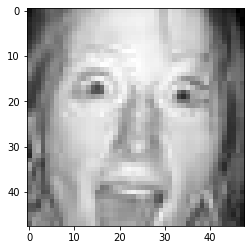

In [35]:
plt.imshow(drama, cmap = 'gray')

In [36]:
drama.shape

(48, 48)

##### Ten en cuenta que las imágenes no están mezcladas, están primero las fotos felices y luego todas las fotos tristes.

In [37]:
train_set[train_set.label == "happy"].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284],
           dtype='int64', length=3285)

In [38]:
train_set[train_set.label == "sadness"].index

Int64Index([3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294,
            ...
            6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175],
           dtype='int64', length=2891)

Accedemos a las imágenes directamente en sus carpetas, puedes usar librerías como `glob` o nuestro ya viejo conocido, `os`.
Para cargar y mostrar las imágenes `imageio` o como ya hemos visto `cv2`.

**Disclaimer** Para gestionar imágenes no es necesario cargar los arrays en nuestro jupyter. 

https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/

In [39]:
X = train_set.drop(['label','path','id_img'],axis=1)

y = train_set["label"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train = X_train/255
X_test = X_test/255

In [42]:
X_val = X_train["array"][-200:]
y_val = y_train[-200:]

X_train = X_train[:-200]
y_train = y_train[:-200]

In [43]:
X_val

1853    [[0.4196078431372549, 0.611764705882353, 0.572...
5232    [[0.12549019607843137, 0.1607843137254902, 0.5...
3763    [[0.7411764705882353, 0.7843137254901961, 0.72...
3304    [[0.22745098039215686, 0.6078431372549019, 0.5...
6072    [[0.41568627450980394, 0.41568627450980394, 0....
                              ...                        
3772    [[0.6509803921568628, 0.07058823529411765, 0.0...
5191    [[0.19607843137254902, 0.15294117647058825, 0....
5226    [[0.08235294117647059, 0.07450980392156863, 0....
5390    [[0.615686274509804, 0.6509803921568628, 0.701...
860     [[0.23921568627450981, 0.24705882352941178, 0....
Name: array, Length: 200, dtype: object

In [44]:
X_train = X_train["array"]
X_test = X_test["array"]

In [45]:
print(type(X_train))
print(type(y_train))
print(type(X_val))
print(type(y_val))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [72]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(48, 48)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))
                            # Hidden layer

model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 2,
                            activation='softmax'))

In [76]:

model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               691500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 721,802
Trainable params: 721,802
Non-trainable params: 0
_________________________________________________________________


In [69]:
X_train = np.array(X_train)
# y_train =  np.array(y_train)
X_val =  np.array(X_val)
# y_val =  np.array(y_val)
X_test =  np.array(X_test)
# y_test =  np.array(y_test)


In [50]:
print(type(X_train))
print(type(y_train))
print(type(X_val))
print(type(y_val))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
X_train = X_train.tolist()
y_train = y_train.tolist()
X_val = X_val.tolist()
y_val = y_val.tolist()
X_test =  X_test.tolist()
y_test =  y_test.tolist()

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_test = le.fit_transform(y_test)

In [71]:
X_test.shape

(1236, 48, 48)

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)

In [60]:
y_train.shape

(4740,)

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_val = le.fit_transform(y_val)

In [61]:
y_val.shape

(200,)

In [77]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 20,
    epochs = 20,
    validation_data = (X_val, y_val) 
)

Epoch 1/20
237/237 [==============================] - 2s 6ms/step - loss: 0.6818 - accuracy: 0.5675 - val_loss: 0.6368 - val_accuracy: 0.6200
Epoch 2/20
237/237 [==============================] - 1s 4ms/step - loss: 0.6453 - accuracy: 0.6278 - val_loss: 0.7127 - val_accuracy: 0.5750
Epoch 3/20
237/237 [==============================] - 1s 4ms/step - loss: 0.6299 - accuracy: 0.6530 - val_loss: 0.6089 - val_accuracy: 0.6500
Epoch 4/20
237/237 [==============================] - 1s 4ms/step - loss: 0.6127 - accuracy: 0.6629 - val_loss: 0.5960 - val_accuracy: 0.6650
Epoch 5/20
237/237 [==============================] - 1s 4ms/step - loss: 0.6017 - accuracy: 0.6778 - val_loss: 0.6998 - val_accuracy: 0.6100
Epoch 6/20
237/237 [==============================] - 1s 4ms/step - loss: 0.5904 - accuracy: 0.6863 - val_loss: 0.5850 - val_accuracy: 0.6550
Epoch 7/20
237/237 [==============================] - 1s 4ms/step - loss: 0.5832 - accuracy: 0.6951 - val_loss: 0.5630 - val_accuracy: 0.7200
Epoch 

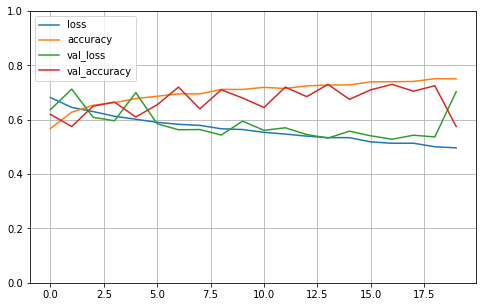

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [79]:
results = model.evaluate(X_test, y_test)
results

39/39 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.5898


[0.7149920463562012, 0.5898058414459229]

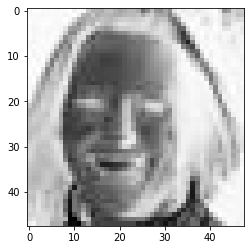

In [80]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(48,48), cmap=plt.cm.get_cmap('Greys'));

In [83]:
predictions = model.predict(X_test).round(2)
print(predictions.shape)
predictions

(1236, 2)


array([[0.36, 0.64],
       [0.48, 0.52],
       [0.17, 0.83],
       ...,
       [0.39, 0.61],
       [0.37, 0.63],
       [0.25, 0.75]], dtype=float32)

In [82]:
predictions.argmax()

1